In [1]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [1]:
! pip install tensorflow --upgrade

In [14]:
pip install torchvision

     |████████████████████████████████| 1.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 137.5 MB 21.8 MB/s eta 0:00:01    |██████████████████▏             | 78.2 MB 18.6 MB/s eta 0:00:04
     |████████████████████████████████| 62 kB 6.5 MB/s  eta 0:00:01
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     |████████████████████████████████| 139 kB 15.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
print(device)

cpu


In [5]:
transformer=transforms.Compose([
    transforms.Resize((150,150)),
    
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

In [25]:
train_path='DATA/'

In [26]:
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)

In [28]:
#root=pathlib.Path(train_path)
classes=['BANGALI_MEL', 'HINDI_MEL', 'MALYALAM_MEL', 'TELUGU_MEL']
print(classes)

['BANGALI_MEL', 'HINDI_MEL', 'MALYALAM_MEL', 'TELUGU_MEL']


In [29]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        
        #Input shape= (256,3,150,150)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (256,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,75,75)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (256,20,75,75)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (256,32,75,75)
        
        
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,75,75)
            
        output=output.view(-1,32*75*75)
            
            
        output=self.fc(output)
            
        return output

In [30]:
model=ConvNet(num_classes=4).to(device)

In [31]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=10

In [32]:
for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss))

KeyboardInterrupt: 

In [1]:
import tensorflow as tf

KeyboardInterrupt: 

In [ ]:
conda install nomkl

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::opt_einsum==3.3.0=pyhd3eb1b0_1
  - defaults/osx-64::mkl_random==1.2.2=py37hb2f4e1b_0
  - defaults/osx-64::scikit-learn==1.0.2=py37hae1ba45_1
  - defaults/noarch::keras-preprocessing==1.1.2=pyhd3eb1b0_0
  - defaults/osx-64::scipy==1.7.3=py37h8c7af03_0
  - defaults/noarch::keras-applications==1.0.8=py_1
  - defaults/osx-64::numpy==1.21.5=py37h2e5f0a9_1
  - defaults/osx-64::tensorflow==2.0.0=mkl_py37hda344b4_0
  - defaults/osx-64::mkl_fft==1.3.1=py37h4ab4a9b_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::opt_einsum==3.3.0=py

In [21]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 12.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 17.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.7 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision

import copy
import time

ModuleNotFoundError: No module named 'matplotlib'

In [17]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1=nn.Conv2d(1,6,kernel_size=5)
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(6,16,kernel_size=5)
        self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(400,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool1(x)
        x=F.relu(self.conv2(x))
        x=self.pool2(x)
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x)
        
        
        
        

In [8]:
#Loading the dataset and preprocessing
batch_size=100
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
len(train_loader.dataset)

60000

In [18]:
net=LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
use_gpu=torch.cuda.is_available()
if use_gpu:
    print('available')
    net=net.cuda()

In [6]:
#inputdata=Variable(torch.Tensor(1,1,32,32))
#outdata=net(inputdata)

In [20]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(net.parameters(),lr=1e-4)

In [1]:
#new



SyntaxError: invalid syntax (3198563677.py, line 6)

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


from tensorflow.keras.models import Model

from tensorflow.keras import layers
from tensorflow.keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)

In [7]:
batch_size = 100
img_height = 217
img_width = 334

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'DATA/',
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11181 files belonging to 4 classes.
Using 8945 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'DATA/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11181 files belonging to 4 classes.
Using 2236 files for validation.


In [64]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [65]:
train_iterator = datagen.flow(train_ds, batch_size)
test_iterator = datagen.flow(val_ds, batch_size)

TypeError: object of type 'int' has no len()

In [10]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(num_classes,activation='softmax',kernel_initializer='he_normal')
])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, None, None, 32)   

In [11]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  
  metrics=['accuracy'])

In [12]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60
)

Epoch 1/60


/Users/sagarahlawat/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


90/90 [==============================] - 68s 738ms/step - loss: 1.3399 - accuracy: 0.3509 - val_loss: 1.3058 - val_accuracy: 0.4012
Epoch 2/60
90/90 [==============================] - 62s 686ms/step - loss: 1.2981 - accuracy: 0.4001 - val_loss: 1.2660 - val_accuracy: 0.4280
Epoch 3/60
90/90 [==============================] - 64s 711ms/step - loss: 1.2492 - accuracy: 0.4383 - val_loss: 1.2238 - val_accuracy: 0.4557
Epoch 4/60
90/90 [==============================] - 62s 682ms/step - loss: 1.1975 - accuracy: 0.4683 - val_loss: 1.2031 - val_accuracy: 0.4472
Epoch 5/60
90/90 [==============================] - 64s 708ms/step - loss: 1.1741 - accuracy: 0.4823 - val_loss: 1.1769 - val_accuracy: 0.4843
Epoch 6/60
90/90 [==============================] - 65s 714ms/step - loss: 1.1223 - accuracy: 0.5179 - val_loss: 1.1382 - val_accuracy: 0.5148
Epoch 7/60
90/90 [==============================] - 67s 738ms/step - loss: 1.0945 - accuracy: 0.5317 - val_loss: 1.1246 - val_accuracy: 0.5250
Epoch 8/60

90/90 [==============================] - 81s 894ms/step - loss: 0.0676 - accuracy: 0.9846 - val_loss: 1.7989 - val_accuracy: 0.5863
Epoch 59/60
90/90 [==============================] - 81s 895ms/step - loss: 0.0668 - accuracy: 0.9848 - val_loss: 1.7360 - val_accuracy: 0.5912
Epoch 60/60
90/90 [==============================] - 80s 880ms/step - loss: 0.0607 - accuracy: 0.9855 - val_loss: 1.7947 - val_accuracy: 0.5868


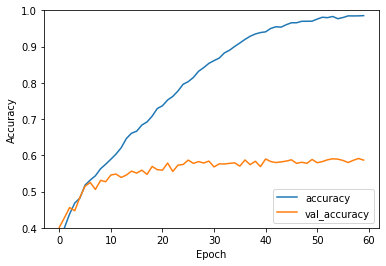

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

In [2]:
import scipy

In [23]:
img=image.load_img('python_jupyter/DATA_DOWN/HINDI MEL/Abhi Toh Party Shuru Hui Hai FULL VIDEO Song  Khoobsurat  Badshah  Aastha.3.wav167.png')

(906, 1395, 3)

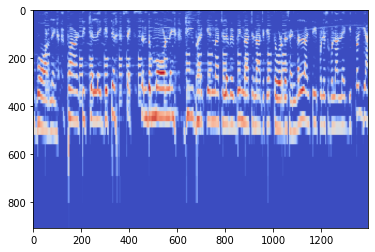

In [24]:
plt.imshow(img)
cv2.imread('python_jupyter/DATA_DOWN/MALYALAM_MEL_LOG/Abhi Toh Party Shuru Hui Hai FULL VIDEO Song  Khoobsurat  Badshah  Aastha.3.wav167.png').shape


In [5]:
from PIL import Image
  
# get image
filepath = 'DATA/BANGALI_MEL/100 Love - Title Track  Jeet  Koel  Jeet Gannguli  Monali Thakur  SVF.wav_vocals.0.wav623.png'
img = Image.open(filepath)
  
# get width and height
width,height = img.size
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  217
The width of the image is:  334


In [2]:
cv2.imread('DATA/BANGALI_MEL/100 Love - Title Track  Jeet  Koel  Jeet Gannguli  Monali Thakur  SVF.wav_vocals.0.wav623.png').shape#height*widht*channels

NameError: name 'cv2' is not defined

In [56]:
import os
DATASET_PATH = "python_jupyter/DATA_DOWN/MALYALAM_MEL_LOG"
#print(os.listdir(DATASET_PATH))
for filename in os.listdir(DATASET_PATH):
    print(cv2.imread('python_jupyter/DATA_DOWN/MALYALAM_MEL_LOG/'+filename).shape)

(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395, 3)
(906, 1395

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(
    'DATA/',target_size=(217,334),color_mode="rgb",class_mode='categorical',batch_size=128,subset='training',
    shuffle = True) # set as training data

validation_generator = train_datagen.flow_from_directory(
    'DATA/',target_size=(217,334),color_mode="rgb",class_mode='categorical',batch_size=128,subset='validation',
    ) # set as validation data

Found 8946 images belonging to 4 classes.
Found 2235 images belonging to 4 classes.


In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,validation_split=0.2)

# Note that the validation data should not be augmented!


# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory('DATA2/',target_size=(217,334),
                                                    batch_size = 128,
                                                    class_mode = 'categorical',
                                                    shuffle = True
                                                    )     

# Flow validation images in batches of 100 using test_datagen generator
#validation_generator =  test_datagen.flow_from_directory('DATA2/',target_size=(217,334),batch_size  = 100,class_mode  = 'categorical', shuffle = True
                                                         # )

Found 15371 images belonging to 4 classes.


In [20]:
train_dataset = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory='DATA/',target_size=(300,300),color_mode="rgb",class_mode='categorical',batch_size=64)
#validation_dataset = ImageDataGenerator(rescale=1./255) \
    #.flow_from_directory(directory='DATA 2/',target_size=(288, 432),color_mode="rgb",class_mode='categorical',classes=['BANGALI MEL','HINDI MEL','TELUGU MEL'],batch_size=32)

Found 1730 images belonging to 4 classes.


In [7]:
img,label=next(train_generator)

In [8]:
img.shape

(128, 217, 334, 3)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

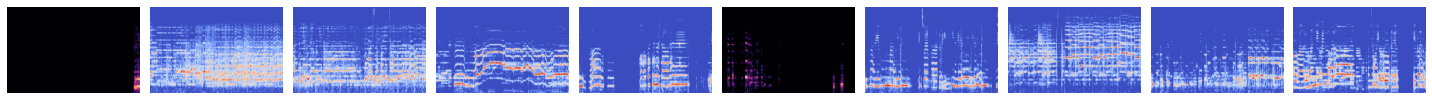

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [10]:
plotImages(img)
print(label)

In [76]:
train=ImageDataGenerator(rescale=1./255)#check if normalixztion bw 0 to 1
validation=ImageDataGenerator(rescale=1./255)

In [32]:
train_dataset=train.flow_from_directory('DATA/',target_size=(288, 432),batch_size=50,class_mode='categorical',color_mode="rgb")
#check if correct image getting downloaded no target size specify
validation_dataset=validation.flow_from_directory('DATA 2/',target_size=(288, 432),batch_size=50,class_mode='categorical',color_mode="rgb")

Found 610 images belonging to 3 classes.
Found 610 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'BANGALI_MEL': 0, 'HINDI_MEL': 1, 'MALYALAM_MEL': 2, 'TELUGU_MEL': 3}

In [10]:
train_dataset

NameError: name 'train_dataset' is not defined

In [11]:
validation_generator.class_indices

{'BANGALI_MEL': 0, 'HINDI_MEL': 1, 'MALYALAM_MEL': 2, 'TELUGU_MEL': 3}

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

AttributeError: module 'tensorflow_core.keras.layers' has no attribute 'RandomFlip'

In [16]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(6, 5, activation='relu',input_shape=(217, 334, 3)),
  tf.keras.layers.AveragePooling2D(2),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(16, 5, activation='relu'),
  tf.keras.layers.AveragePooling2D(2),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(120, 5, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(4, activation='softmax',kernel_initializer='he_normal')
  ])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0008)#Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy']) 

history=model.fit_generator(train_generator,epochs=60,validation_data=validation_generator)

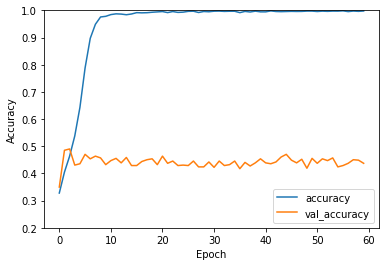

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

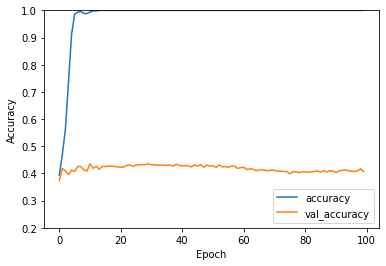

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

In [7]:
scoreSeg = model.evaluate_generator(validation_generator, 20)

<ipython-input-7-4b7781fd3113>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = model.evaluate_generator(validation_generator, 20)


In [21]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 10.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
import scipy

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
#from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [18]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(217,334,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

2022-07-09 08:28:06.084869: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-09 08:28:06.086532: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [19]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [20]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
resnet_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_generator,epochs=40,validation_data=validation_generator)

Train for 76 steps, validate for 33 steps
Epoch 1/40
76/76 [==============================] - 648s 9s/step - loss: 1.1690 - accuracy: 0.4815 - val_loss: 1.6062 - val_accuracy: 0.2282
Epoch 2/40
76/76 [==============================] - 666s 9s/step - loss: 0.8978 - accuracy: 0.6076 - val_loss: 1.7060 - val_accuracy: 0.2282
Epoch 3/40
76/76 [==============================] - 662s 9s/step - loss: 0.7693 - accuracy: 0.7032 - val_loss: 1.7236 - val_accuracy: 0.2282
Epoch 4/40
76/76 [==============================] - 670s 9s/step - loss: 0.6710 - accuracy: 0.7601 - val_loss: 1.8686 - val_accuracy: 0.2224
Epoch 5/40
76/76 [==============================] - 674s 9s/step - loss: 0.5847 - accuracy: 0.8063 - val_loss: 1.8863 - val_accuracy: 0.2012
Epoch 6/40
37/76 [=============>................] - ETA: 4:11 - loss: 0.4851 - accuracy: 0.8524

KeyboardInterrupt: 

In [12]:
pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 3.0 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 7.6 MB/s eta 0:00:01
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
def GenreModel(input_shape = (217,334,3),classes=4):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1),padding='same')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1),padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1),padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same')(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  X = tf.keras.layers.Dropout(rate=0.5)(X)
  #X = Dense(128,activation='sigmoid')(X)
  #X = Dense(64,activation='sigmoid')(X)
  #X = Dense(32,activation='sigmoid')(X)
  X = Dense(4,activation='softmax')(X)

  #X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [29]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """
    #input_shape = (288,432,3)

    # build network topology
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    return model

In [36]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(217,334, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') 
])

In [37]:
#model = build_model(input_shape=(217,334,3))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100


<ipython-input-37-6fc14633720c>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)


45/45 [==============================] - 14s 314ms/step - loss: 1.3829 - accuracy: 0.3348 - val_loss: 1.3774 - val_accuracy: 0.3574
Epoch 2/100
45/45 [==============================] - 14s 308ms/step - loss: 1.3769 - accuracy: 0.3454 - val_loss: 1.3720 - val_accuracy: 0.3489
Epoch 3/100
45/45 [==============================] - 14s 307ms/step - loss: 1.3722 - accuracy: 0.3443 - val_loss: 1.3681 - val_accuracy: 0.3461
Epoch 4/100
45/45 [==============================] - 14s 318ms/step - loss: 1.3678 - accuracy: 0.3457 - val_loss: 1.3641 - val_accuracy: 0.3475
Epoch 5/100
45/45 [==============================] - 14s 316ms/step - loss: 1.3640 - accuracy: 0.3450 - val_loss: 1.3609 - val_accuracy: 0.3447
Epoch 6/100
45/45 [==============================] - 14s 314ms/step - loss: 1.3608 - accuracy: 0.3450 - val_loss: 1.3583 - val_accuracy: 0.3433
Epoch 7/100
45/45 [==============================] - 14s 316ms/step - loss: 1.3581 - accuracy: 0.3454 - val_loss: 1.3560 - val_accuracy: 0.3433
Epoc

In [12]:
model = GenreModel(input_shape=(217,334,3),classes=4)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)#Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy']) 

history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100


<ipython-input-12-e6966cc53b50>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)


45/45 [==============================] - 13s 284ms/step - loss: 1.8626 - accuracy: 0.3305 - val_loss: 1.4275 - val_accuracy: 0.1532
Epoch 2/100
45/45 [==============================] - 13s 276ms/step - loss: 1.4860 - accuracy: 0.4000 - val_loss: 1.4396 - val_accuracy: 0.1532
Epoch 3/100
45/45 [==============================] - 13s 280ms/step - loss: 1.3551 - accuracy: 0.4301 - val_loss: 1.5168 - val_accuracy: 0.1532
Epoch 4/100
17/45 [==========>...................] - ETA: 6s - loss: 1.2680 - accuracy: 0.4718

KeyboardInterrupt: 

In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
history=model.fit_generator(train_generator,epochs=40,validation_data=validation_generator)

Epoch 1/40
41/41 [==============================] - 838s 20s/step - loss: 0.8698 - accuracy: 0.6414 - val_loss: 1.1193 - val_accuracy: 0.5208
Epoch 2/40
41/41 [==============================] - 768s 19s/step - loss: 0.8514 - accuracy: 0.6455 - val_loss: 1.1273 - val_accuracy: 0.5108
Epoch 3/40
41/41 [==============================] - 716s 17s/step - loss: 0.8670 - accuracy: 0.6399 - val_loss: 1.1264 - val_accuracy: 0.5169
Epoch 4/40
41/41 [==============================] - 719s 18s/step - loss: 0.8437 - accuracy: 0.6518 - val_loss: 1.1053 - val_accuracy: 0.5139
Epoch 5/40
41/41 [==============================] - 725s 18s/step - loss: 0.8409 - accuracy: 0.6493 - val_loss: 1.0698 - val_accuracy: 0.5177
Epoch 6/40
41/41 [==============================] - 766s 19s/step - loss: 0.8179 - accuracy: 0.6664 - val_loss: 1.0871 - val_accuracy: 0.5216
Epoch 7/40
41/41 [==============================] - 750s 18s/step - loss: 0.8124 - accuracy: 0.6651 - val_loss: 1.1020 - val_accuracy: 0.5270
Epoch 

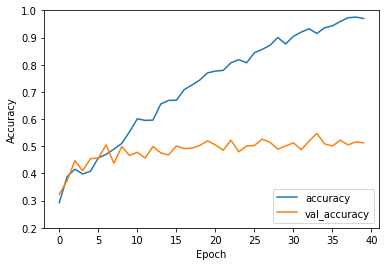

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

In [40]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(288,432,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='sigmoid'),
                                  tf.keras.layers.Dense(128,activation='softmax'),
                                  tf.keras.layers.Dense(3)
                                  
                                  
                                  
    
]
)

In [33]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same',input_shape=(288,432,3)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='softmax'),
        tf.keras.layers.Dense(3)])

In [27]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

loss='categorical_crossentropy'
#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [42]:
model.compile(loss=loss,optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0008),metrics=['accuracy'])

In [56]:
model.compile(optimizer=,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [47]:
model_fit=model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

2022-06-27 15:05:01.628135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 61
2022-06-27 15:05:11.563952: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 53 of 61
2022-06-27 15:05:14.616917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 61 steps, validate for 61 steps
Epoch 1/20


2022-06-27 15:05:25.718021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 61
2022-06-27 15:05:35.562184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 53 of 61
2022-06-27 15:05:38.615454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


61/61 [==============================] - 300s 5s/step - loss: 1.1160 - accuracy: 0.3721 - val_loss: 1.0952 - val_accuracy: 0.3852
Epoch 2/20


2022-06-27 15:10:25.296314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 61
2022-06-27 15:10:35.319341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 53 of 61
2022-06-27 15:10:38.448466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


61/61 [==============================] - 305s 5s/step - loss: 1.0987 - accuracy: 0.3738 - val_loss: 1.0919 - val_accuracy: 0.3852
Epoch 3/20


2022-06-27 15:15:29.925522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 26 of 61
2022-06-27 15:15:39.842962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 61
2022-06-27 15:15:43.650363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


61/61 [==============================] - 305s 5s/step - loss: 1.0953 - accuracy: 0.3721 - val_loss: 1.0915 - val_accuracy: 0.3852
Epoch 4/20


2022-06-27 15:20:34.569622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 61
2022-06-27 15:20:44.481427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 53 of 61
2022-06-27 15:20:47.554986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


 7/61 [==>...........................] - ETA: 5:41 - loss: 1.1008 - accuracy: 0.3667

KeyboardInterrupt: 